In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import io
dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

In [0]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
training_set = dataset_train.iloc[:,1:2].values

In [0]:
training_set.shape

(1258, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler(feature_range=(0,1))

In [0]:
training_set_scaled = sc.fit_transform(training_set)

In [0]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
X_train = []
y_train = []
for i in range(30, 1258):
  X_train.append(training_set_scaled[i-30:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

In [0]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))

In [0]:
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))

In [0]:
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=False))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1228/1228 [==============================] - 9s 7ms/step - loss: 0.0557
Epoch 2/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0065
Epoch 3/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 4/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 5/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 7/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 8/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 10/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/100
1228/1228 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1228/1228 [==============================] - 6s 5ms/step - lo

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [0]:
import io
dataset_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))

In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 100:].values

In [0]:
inputs = inputs.reshape(-1,1)

In [0]:
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(30,50):
  X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price

array([[761.5542 ],
       [763.33527],
       [766.85114],
       [769.35254],
       [768.3086 ],
       [765.9918 ],
       [765.12085],
       [764.591  ],
       [763.71326],
       [763.31085],
       [764.28314],
       [765.78314],
       [767.08234],
       [767.3088 ],
       [768.8939 ],
       [770.4676 ],
       [770.6333 ],
       [769.9183 ],
       [768.69684],
       [769.5856 ]], dtype=float32)

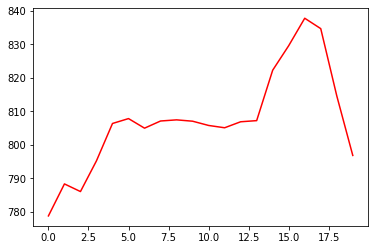

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

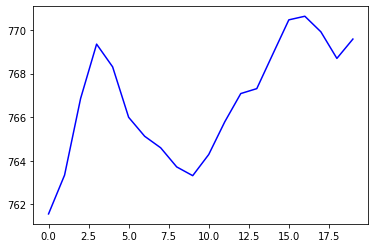

In [0]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google mStock Price')

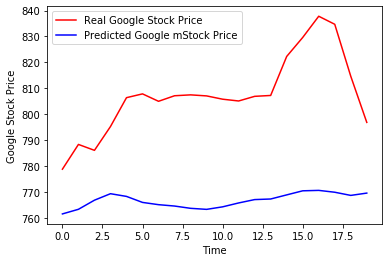

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google mStock Price')
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [0]:
#Absolute error
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [0]:
rmse

42.87930028608078